## Read Dataset

In [1436]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import seaborn as sn
df = pd.read_csv('../traineddataUpdate.csv')
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080


In [1437]:
df.shape

(1302, 13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

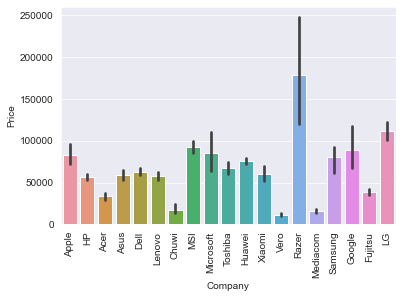

In [1438]:
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')

C:\Users\salitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

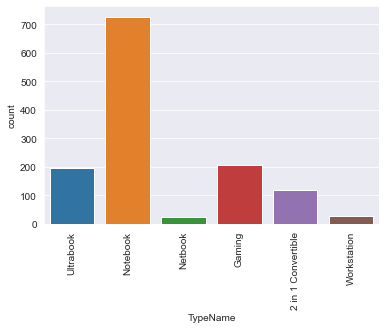

In [1439]:
sn.countplot(df['TypeName'])
plt.xticks(rotation = 'vertical')

C:\Users\salitha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


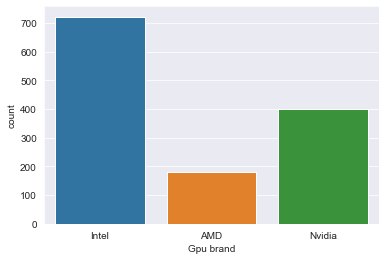

In [1440]:
sn.countplot(df['Gpu brand'])
plt.show()

In [1441]:
cpu_manufact = df['CPU_name'].str.split(' ',n = 1,expand=True)
cpu_manufact.head()
df['CPU_manufacture'] = cpu_manufact[0]

In [1442]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel


<AxesSubplot:ylabel='None'>

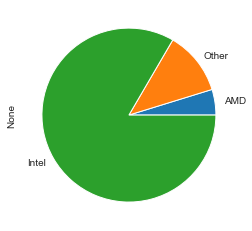

In [1443]:
cpu_value = df.value_counts('CPU_manufacture')
cpu_value.sort_values().plot(kind='pie')

In [1444]:
CPU_manufacture_type = df.value_counts("CPU_manufacture")
print(CPU_manufacture_type)

CPU_manufacture
Intel    1086
Other     154
AMD        62
dtype: int64


In [1445]:
# def type_convert_numeric1():
#     df['CPU_manufacture_type'] = np.select(
#         condlist=[
#             df['CPU_manufacture'] == "Intel",
#             df['CPU_manufacture'] == "Other",
#             df['CPU_manufacture'] == "AMD",
#         ],
#         choicelist=[
#             0,
#             1,
#             2
#         ],
#         default=0
#     )
#
# listTypes = ["Intel", "Other", "AMD"]
# for value in listTypes:
#     type_convert_numeric1()
#
# df.head()

In [1446]:
notebook_type = df.value_counts("TypeName")
print(notebook_type)


TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
dtype: int64


In [1447]:
def type_convert_numeric():
    df['Type'] = np.select(
        condlist=[
            df['TypeName'] == "Notebook",
            df['TypeName'] == "Gaming",
            df['TypeName'] == "Ultrabook",
            df['TypeName'] == "2 in 1 Convertible",
            df['TypeName'] == "Workstation",
            df['TypeName'] == "Netbook",
        ],
        choicelist=[
            0,
            1,
            2,
            3,
            4,
            5
        ],
        default=0
    )

listTypes = ["Notebook", "Gaming", "Ultrabook", "2 in 1 Convertible", "Workstation", "Netbook"]
for value in listTypes:
    type_convert_numeric()

df.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Price,CPU_manufacture,Type
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,71378.6832,Intel,2
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,47895.5232,Intel,2
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,30636.0000,Intel,0
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,135195.3360,Intel,2
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,96095.8080,Intel,2


In [1448]:
company = df.value_counts("Company")
print(company)

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Fujitsu        3
Chuwi          3
LG             3
Huawei         2
dtype: int64


In [1449]:
df.isnull().sum().sum()

0

<AxesSubplot:xlabel='Price', ylabel='Count'>

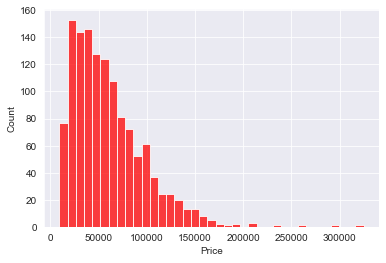

In [1450]:
sn.histplot(df['Price'],color='red')

# Vizualize data

## Define X and Y cordinates

In [1451]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


x = df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1)
#x = np.log(df.drop(['Price', 'Company', 'TypeName', 'OpSys', 'CPU_name', 'CPU_manufacture', 'Gpu brand'], axis=1))

#x = df.drop(['Price'], axis=1)
#y = df['Price']
testing = np.log(df['Price'])



In [1452]:
x

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Type
0,2.079442,0.314811,-inf,0.0,5.424875,-inf,4.852030,0.693147
1,2.079442,0.292670,-inf,-inf,4.849511,-inf,-inf,0.693147
2,2.079442,0.620576,-inf,-inf,4.950262,-inf,5.545177,-inf
3,2.772589,0.604316,-inf,0.0,5.396055,-inf,6.238325,0.693147
4,2.079442,0.314811,-inf,0.0,5.424875,-inf,5.545177,0.693147
...,...,...,...,...,...,...,...,...
1297,1.386294,0.587787,0.0,0.0,5.058476,-inf,4.852030,1.098612
1298,2.772589,0.262364,0.0,0.0,5.620595,-inf,6.238325,1.098612
1299,0.693147,0.405465,-inf,-inf,4.717920,-inf,-inf,-inf
1300,1.791759,0.783902,-inf,-inf,4.609707,6.907755,-inf,-inf


In [1453]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, testing, test_size=0.15, random_state=2)

X_train.shape,X_test.shape

((1106, 8), (196, 8))

In [1454]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Ram',
 1: 'Weight',
 2: 'TouchScreen',
 3: 'IPS',
 4: 'PPI',
 5: 'HDD',
 6: 'SSD',
 7: 'Type'}

In [1455]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11,12])
# ],remainder='passthrough')



step2 = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              oob_score=True)


pipe = Pipeline([
    #('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)


print('R2 score',metrics.r2_score(y_test,y_pred))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
classifier_rf = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              oob_score=True)


In [ ]:
%%time
classifier_rf.fit(X_train, y_train)

In [ ]:
# checking the oob score
classifier_rf.oob_score_

In [ ]:
# Make predictions for the test set
y_pred_test = classifier_rf.predict(X_test)

In [ ]:
# View accuracy score
classifier_rf.score(X_test, y_test)

# Main Points to Concern

In [ ]:
#when adding np.log accuracy increased from 0.817992766637844 to 0.8872578010268356


# Description

## 1

When dropping columns with df.drop
without pipeline accuracy - 0.7668858153216616
with pipeline - 0.7668858153216616

So with pipeline noting specially happens

In [ ]:
## 2